In [2]:
import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.misc import imread
import matplotlib as mpl

%matplotlib inline

In [3]:
def visualize_tree(tree, feature_names, fh=10, fw=10):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
    plt.figure(figsize=(fh, fw))
    plt.imshow(imread('dt.png'))
    plt.axis("off")

In [4]:
titanic = pd.read_csv('train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
feature_names = ["Sex", "Age", "SibSp"]

target = titanic["Survived"].copy()
data = titanic[feature_names].copy()
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Sex"] = list(map(int, data["Sex"] == 'male'))

In [10]:
data.head()

Sex  Age  SibSp
0    1   22      1
1    0   38      1
2    0   26      0
3    0   35      1
4    1   35      0

In [15]:
titanic.groupby("Survived")["Sex"].count()

Survived
0    549
1    342
Name: Sex, dtype: int64

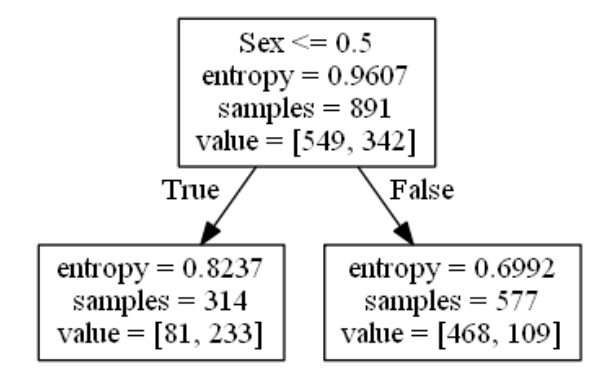

In [11]:
clf = DecisionTreeClassifier(max_depth=1, criterion="entropy")
clf.fit(data, target)
visualize_tree(clf, feature_names)

In [26]:
information_gain(549, 342, 81, 233, 468, 109)

0.21766010666061419

In [23]:
x = 549
y = 342
x1 = 81
y1 = 233
x2 = 468
y2 = 109
t = x + y
entropy(x1, y1) * (x1 + y1) / t, entropy(x2, y2) * (x2 + y2) / t, entropy(x, y)

(0.29026677128380363, 0.45278102393122904, 0.96070790187564692)

In [27]:
def entropy(x, y):
    t = x + y
    return -x / t * np.log2(x / t) - y / t * np.log2(y / t)

def information_gain(x, y, x1, y1, x2, y2):
    t = x + y
    return entropy(x, y) - (entropy(x1, y1) * (x1 + y1) / t 
                            + entropy(x2, y2) * (x2 + y2) / t)

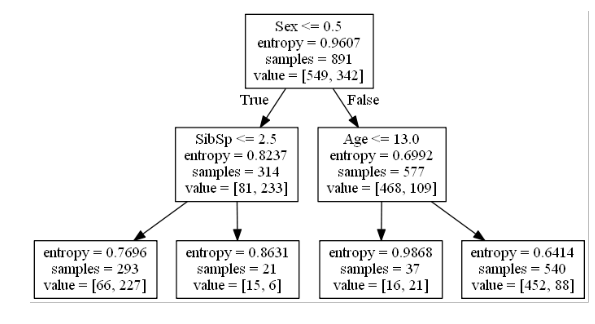

In [28]:
clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
clf.fit(data, target)
visualize_tree(clf, feature_names)

In [29]:
titanic.groupby(["SibSp", "Survived"])["Sex"].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Sex, dtype: int64

In [32]:
information_gain(549, 342, 398+97+15, 210+112+13, 12+15+5+7, 4+3)

0.010126533258115078

In [33]:
iris = datasets.load_iris()

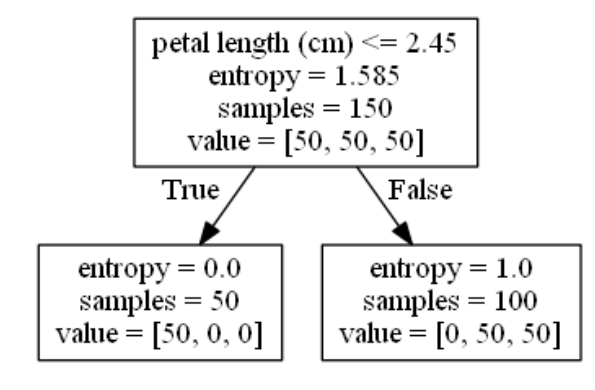

In [36]:
clf = DecisionTreeClassifier(max_depth=1, criterion="entropy")
clf.fit(iris.data, iris.target)
visualize_tree(clf, iris.feature_names)

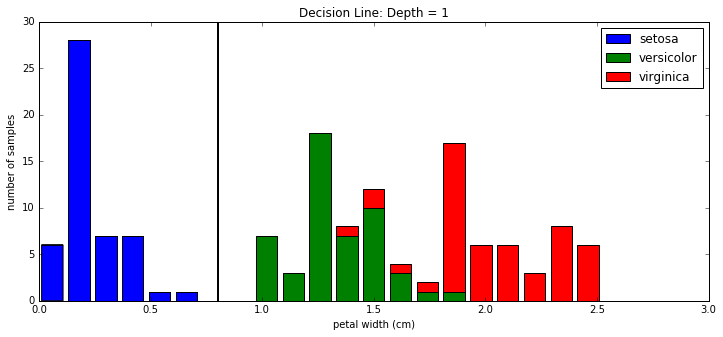

In [37]:
plt.figure(1,figsize=(12,5))
plt.title("Decision Line: Depth = 1")
plt.xlabel(iris.feature_names[3])
plt.ylabel("number of samples")

data_t0 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 2])

plt.hist([data_t0[:,3], data_t1[:,3], data_t2[:,3]], label=iris.target_names, range=(0,3), bins=25, stacked=True)
plt.plot([0.8, 0.8],[0,30],linewidth=2, color='k')
plt.legend(loc='upper right')

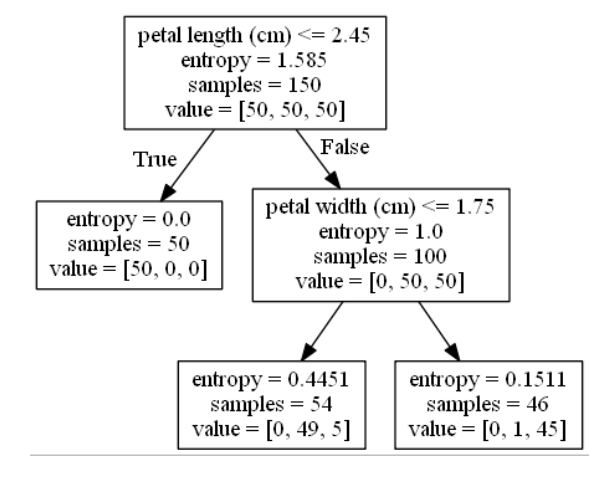

In [38]:
clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
clf.fit(iris.data, iris.target)
visualize_tree(clf, iris.feature_names)

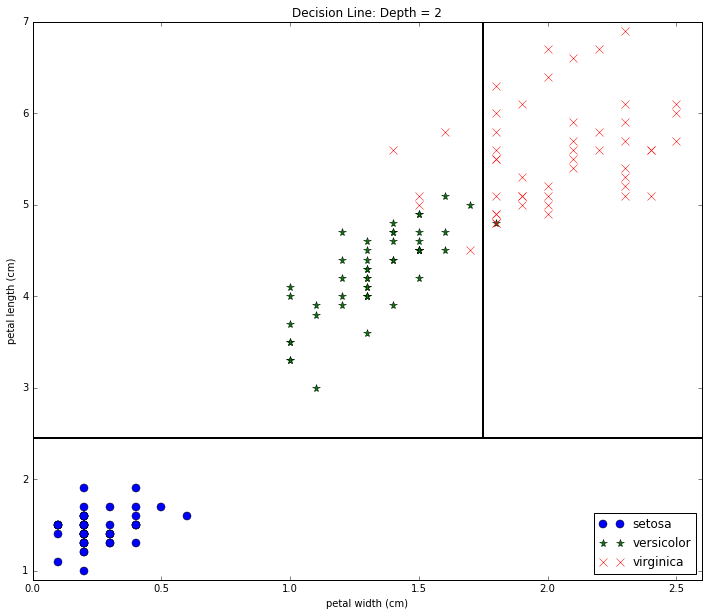

In [39]:
plt.figure(2,figsize=(12,10))
plt.title("Decision Line: Depth = 2")
plt.xlabel(iris.feature_names[3])
plt.ylabel(iris.feature_names[2])

data_t0 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 2])

plt.plot(data_t0[:,3], data_t0[:,2], 'o', label=iris.target_names[0], markersize=8)
plt.plot(data_t1[:,3], data_t1[:,2], '*', label=iris.target_names[1], markersize=8)
plt.plot(data_t2[:,3], data_t2[:,2], 'x', label=iris.target_names[2], markersize=8)


plt.ylim([0.9,7.])
plt.xlim([0,2.6])
plt.plot([0,2.6],[2.45,2.45],linewidth=2, color='k')
plt.plot([1.75, 1.75],[2.45,7.],linewidth=2, color='k')

plt.legend(loc='lower right')

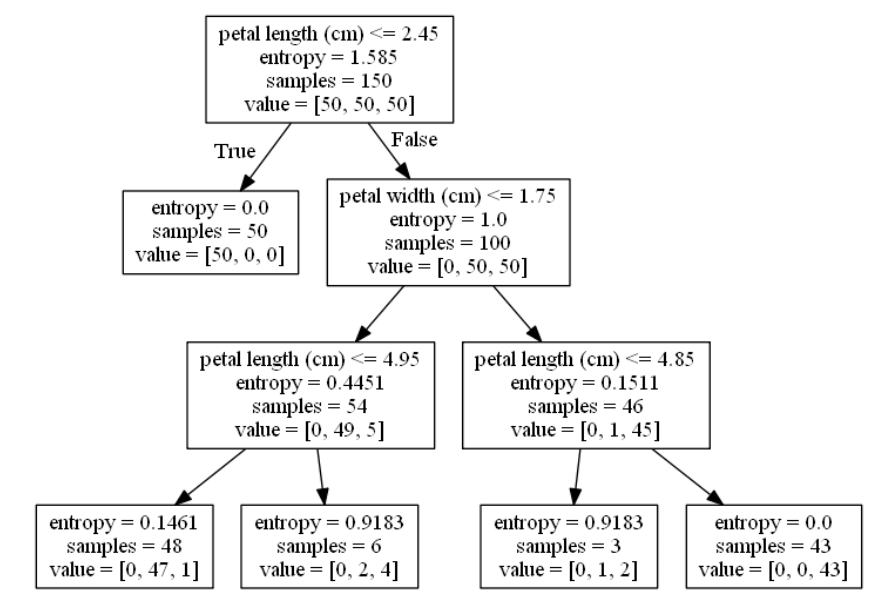

In [42]:
clf = DecisionTreeClassifier(max_depth=3, criterion="entropy", )
clf.fit(iris.data, iris.target)
visualize_tree(clf, iris.feature_names, 15, 15)

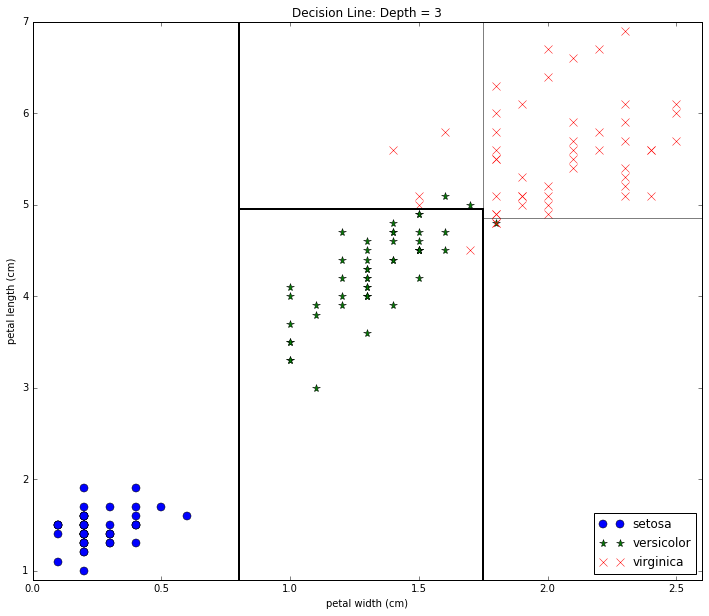

In [44]:
plt.figure(3,figsize=(12,10))
plt.title("Decision Line: Depth = 3")
plt.xlabel(iris.feature_names[3])
plt.ylabel(iris.feature_names[2])

data_t0 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 2])

plt.plot(data_t0[:,3], data_t0[:,2], 'o', label=iris.target_names[0], markersize=8)
plt.plot(data_t1[:,3], data_t1[:,2], '*', label=iris.target_names[1], markersize=8)
plt.plot(data_t2[:,3], data_t2[:,2], 'x', label=iris.target_names[2], markersize=8)

plt.plot([0.8, 0.8],[0.9,7.],linewidth=2, color='k')
plt.plot([1.75, 1.75],[0.9,4.95],linewidth=2, color='k')
plt.plot([1.75, 1.75],[4.95,7.],linewidth=0.5, color='k')
plt.ylim([0.9,7.])
plt.plot([0.8, 1.75],[4.95,4.95],linewidth=2, color='k')
plt.plot([1.75, 2.6],[4.85,4.85],linewidth=0.5, color='k')
plt.xlim([0,2.6])

plt.legend(loc='lower right')

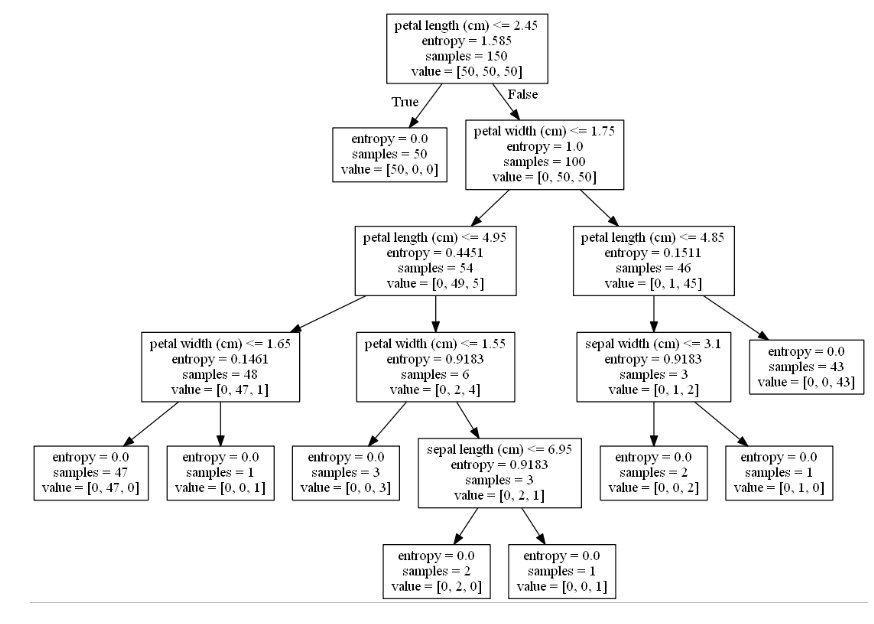

In [45]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(iris.data, iris.target)
visualize_tree(clf, iris.feature_names, 15, 20)

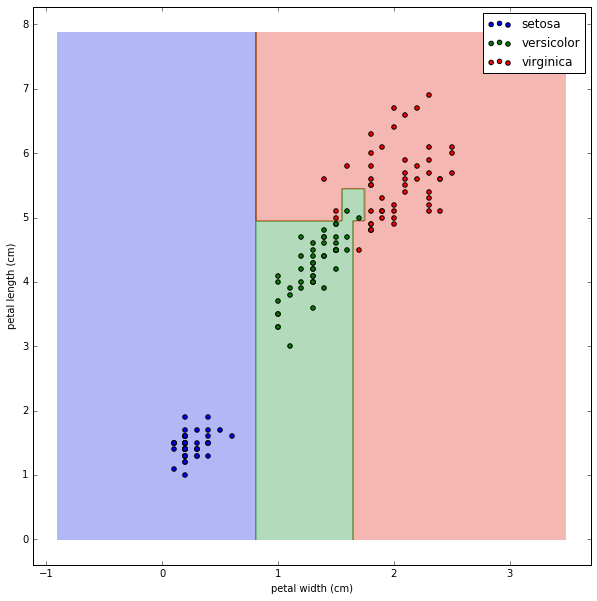

In [46]:
n_classes = 3
plot_colors = "bgr"
plot_step = 0.02
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.5, 0.6, 0.6),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap('custom1', cdict)

plt.figure(4,figsize=(10,10))

pair = [3,2]
X = iris.data[:, pair]
y = iris.target

clf = DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z,cmap=cmap,alpha=0.3)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=cmap)
plt.axis("tight")
plt.legend()

In [47]:
mpl.rcParams['axes.color_cycle'] = ['#7FB5C7', '#E63E65', '#5B5BC9', '#55D957']

C:\Users\ivypa\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [48]:
bikes = pd.read_csv('bikes.csv')
bikes.head()

date  temperature   humidity  windspeed  count
0  2011-01-03     2.716070  45.715346  21.414957    120
1  2011-01-04     2.896673  54.267219  15.136882    108
2  2011-01-05     4.235654  45.697702  17.034578     82
3  2011-01-06     3.112643  50.237349  10.091568     88
4  2011-01-07     2.723918  49.144928  15.738204    148

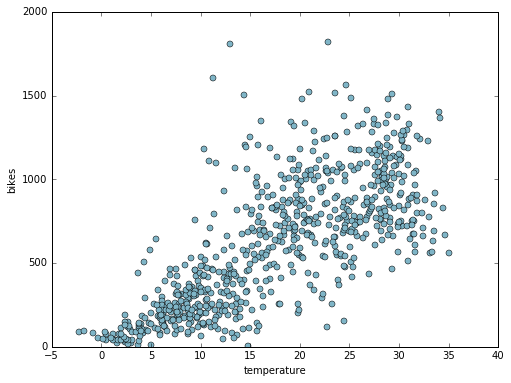

In [49]:
plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')

In [51]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(np.array([bikes['temperature']]).T, bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [53]:
regressor.predict(5.)

array([ 189.23183761])

In [54]:
regressor.predict(20.)

array([ 769.08756039])

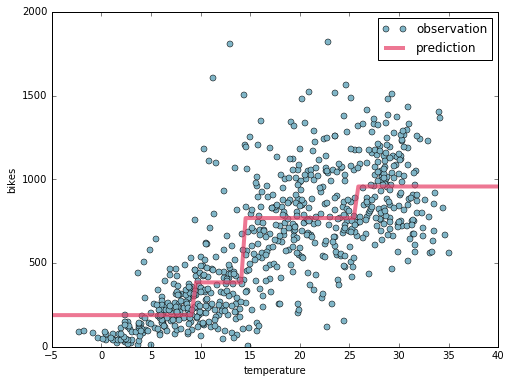

In [55]:
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

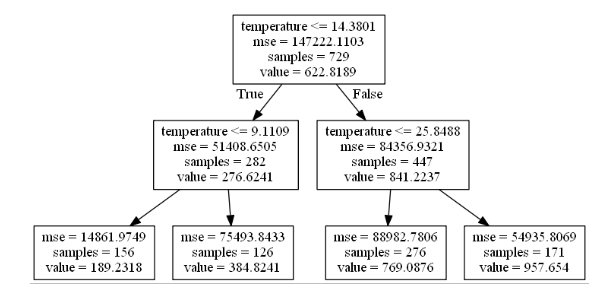

In [56]:
visualize_tree(regressor, ['temperature'])

In [57]:
bikes[bikes['temperature'] <= 14.3801]["count"].mean()

276.6241134751773